In [1]:
# importing general packages

import numpy as np
import os, sys
import matplotlib.pyplot as plt

import xspec as xs
xs.Xset.allowPrompting = False #keeps pyxspec from hanging, waiting a response to a prompt
xs.Xset.allowNewAttributes = True

In [2]:
# What does the  unfolded spectrum look like from XSPEC? (Note that this is model dependent, but background is 
# well fit by power law, and the differences minimal + it still indicates the level on the order 
# of magnitude consideration)


# This is for 80 seconds for the spectral file

xs.AllData.clear()
average = xs.Spectrum("backgrounds_revised/medium/coarse/bn121225417_LAT-LLE_bkgspectra.bak{1}")
average.response = "backgrounds_revised/medium/coarse/bn121225417_LAT-LLE_weightedrsp.rsp"

xs.AllModels.clear()
m=xs.Model("pow")
xs.Fit.perform()

xs.Plot.device="/xs"
xs.Plot.xAxis="MeV"
xs.Plot.add=True
xs.Plot.background=True
xs.Plot.xLog=True
xs.Plot.yLog=True
xs.Plot.show()
xs.Plot("ufspec") # this is unfolded spectrum

x_average_uf_80= xs.Plot.x(1)
y_average_uf_80 = xs.Plot.y(1)
xErrs_average_uf_80 = xs.Plot.xErr(1)
yErrs_average_uf_80 = xs.Plot.yErr(1)


User entered plot commands:


In [3]:
# This is for 20 seconds for the spectral file

xs.AllData.clear()
average = xs.Spectrum("bkg_20s/bn121225417_LAT-LLE_bkgspectra.bak{1}")
average.response = "bkg_20s/bn121225417_LAT-LLE_weightedrsp.rsp"

xs.AllModels.clear()
m=xs.Model("pow")
xs.Fit.perform()

xs.Plot.device="/xs"
xs.Plot.xAxis="MeV"
xs.Plot.add=True
xs.Plot.background=True
xs.Plot.xLog=True
xs.Plot.yLog=True
xs.Plot.show()
xs.Plot("ufspec") # this is unfolded spectrum

x_average_uf_20= xs.Plot.x(1)
y_average_uf_20 = xs.Plot.y(1)
xErrs_average_uf_20 = xs.Plot.xErr(1)
yErrs_average_uf_20 = xs.Plot.yErr(1)


User entered plot commands:


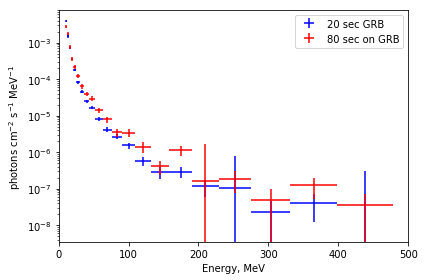

In [4]:
plt.errorbar(x_average_uf_20, y_average_uf_20, xerr = xErrs_average_uf_20, yerr = yErrs_average_uf_20, ls='none', color='b', label='20 sec GRB')
plt.errorbar(x_average_uf_80, y_average_uf_80, xerr = xErrs_average_uf_80, yerr = yErrs_average_uf_80, ls='none', color='r', label='80 sec on GRB')
plt.ylabel('photons cm$^{-2}$ s$^{-1}$ MeV$^{-1}$ ')
plt.xlabel('Energy, MeV')
plt.yscale('log')
plt.xlim(0, 5e2)
plt.legend()
plt.tight_layout()
plt.show()



In [5]:
from astropy.io import fits

# This is 80-second interval for the GRB

spec_80 = fits.open("backgrounds_revised/medium/coarse/bn121225417_LAT-LLE_srcspectra.pha")
spec_80[3].header['TSTOP']- spec_80[3].header['TSTART']

80.0

In [6]:
# and for 20 s ...
spec_20 = fits.open("bkg_20s/bn121225417_LAT-LLE_srcspectra.pha")
spec_20[3].header['TSTOP']- spec_20[3].header['TSTART']

20.0

In [7]:
# Number of background counts for each background

from scipy import integrate

# LLE effective area: https://confluence.slac.stanford.edu/display/SCIGRPS/LLE+2.0 

area = 4000 # 1m^2?
bkg_cts_80s = integrate.simps(y_average_uf_80, x_average_uf_80)*80*area
bkg_cts_20s = integrate.simps(y_average_uf_20, x_average_uf_20)*20*area

print('Number of background counts for 80 seconds is %.1f, and for 20 seconds it is %.1f.' %(bkg_cts_80s, bkg_cts_20s))

Number of background counts for 80 seconds is 4313.5, and for 20 seconds it is 1011.6.
